# 统计总词频

In [5]:
#-*-coding:UTF-8-*-
import jieba
from jieba import analyse
import json
import chardet
import codecs
import re

stoplist = []
for line in codecs.open('stopword1.txt','r','utf-8'):
    if b'\xef\xbb\xbf' in line.encode('utf-8'):
        stoplist.append(line.replace(b'\xef\xbb\xbf'.decode(),'').strip())
    else:
        stoplist.append(line.strip())
stop_list={}.fromkeys(stoplist)


word_list = {}
number = re.compile('[0-9]+\.*[0-9]*')
space = re.compile('(\s)+')
html = re.compile('<.*?>')
blank = re.compile('_+\.*_*')
with codecs.open('answer.txt','r','utf-8') as lf:
    for line in lf:
        js = json.loads(line.strip())
        question = re.sub(html,' ',js['value']['question'])
        seg_list = jieba.cut(question)
        for word in seg_list:
            if number.search(word):
                word = '0'
            if space.search(word) or blank.search(word):
                continue
            if word in word_list:
                word_list[word] += 1
            else:
                word_list[word] = 1
        if 'analysis' in js['value']:
            analysis = re.sub(html,' ',js['value']['analysis'])
            seg_list = jieba.cut(analysis)
            for word in seg_list:
                if number.search(word):
                    word = '0'
                if space.search(word):
                    continue
                if word in word_list:
                    word_list[word] += 1
                else:
                    word_list[word] = 1

with codecs.open('answerword.txt','w','utf-8') as wf:
    for key in sorted(word_list.keys(),key=lambda d:d,reverse=True):
        if key in stop_list:
            del(word_list[key])
        else:
            wf.write('%s %i\n'%(key,word_list[key]))
            print (key, word_list[key], type(key))
        


￢ 17 <class 'str'>
４ 1 <class 'str'>
０ 3 <class 'str'>
﹣ 21 <class 'str'>
 1 <class 'str'>
 3 <class 'str'>
 1 <class 'str'>
龟甲 3 <class 'str'>
龙岩 1 <class 'str'>
龙 2 <class 'str'>
齿轮 1 <class 'str'>
齐桓公 2 <class 'str'>
齐平 1 <class 'str'>
齐及 2 <class 'str'>
鼻 1 <class 'str'>
鼠因 1 <class 'str'>
鼠 7 <class 'str'>
鼓膜 1 <class 'str'>
鼓励 1 <class 'str'>
鼓 5 <class 'str'>
黑龙江省 1 <class 'str'>
黑龙江 2 <class 'str'>
黑色 11 <class 'str'>
黑白 1 <class 'str'>
黑球 1 <class 'str'>
黑点 1 <class 'str'>
黑灰撒 1 <class 'str'>
黑板 1 <class 'str'>
黑 4 <class 'str'>
黄雀在后 1 <class 'str'>
黄铜 5 <class 'str'>
黄金 1 <class 'str'>
黄种人 1 <class 'str'>
黄瓜 3 <class 'str'>
黄球 7 <class 'str'>
黄浦江 1 <class 'str'>
黄河流域 3 <class 'str'>
黄河三角洲 2 <class 'str'>
黄昏 1 <class 'str'>
黄帝 1 <class 'str'>
黄山 5 <class 'str'>
黄勇 1 <class 'str'>
黄 3 <class 'str'>
麻黄碱 1 <class 'str'>
麻烦 3 <class 'str'>
麦哲伦 1 <class 'str'>
鹿园 1 <class 'str'>
鹰 5 <class 'str'>
鸦片 4 <class 'str'>
鸡蛋 16 <class 'str'>
鸡冠区 1 <class 'str'>
鸡 2 <class 'str'>
鸟巢 1 <

# 按年级统计词频

In [6]:
grade1dict = dict(word_list)
grade2dict = dict(word_list)
grade3dict = dict(word_list)
grade4dict = dict(word_list)
for item in grade1dict:
    grade1dict[item] = 0
    grade2dict[item] = 0
    grade3dict[item] = 0
    grade4dict[item] = 0
    
with codecs.open('answer.txt','r','utf-8') as lf:
    for line in lf:
        js = json.loads(line.strip())
        question = re.sub(html,' ',js['value']['question'])
        seg_list = jieba.cut(question)
        for word in seg_list:
            if number.search(word):
                word = '0'
            if space.search(word) or blank.search(word):
                continue
            if js['value']['grade'] == 1:
                if word in grade1dict:
                    grade1dict[word] += 1
            elif js['value']['grade'] == 2:
                if word in grade2dict:
                    grade2dict[word] += 1
            elif js['value']['grade'] == 3:
                if word in grade3dict:
                    grade3dict[word] += 1
            elif js['value']['grade'] == 4:
                if word in grade4dict:
                    grade4dict[word] += 1
        if 'analysis' in js['value']:
            analysis = re.sub(html,' ',js['value']['analysis'])
            seg_list = jieba.cut(analysis)
            for word in seg_list:
                if number.search(word):
                    word = '0'
                if space.search(word) or blank.search(word):
                    continue
                if js['value']['grade'] == 1:
                    if word in grade1dict:
                        grade1dict[word] += 1
                elif js['value']['grade'] == 2:
                    if word in grade2dict:
                        grade2dict[word] += 1
                elif js['value']['grade'] == 3:
                    if word in grade3dict:
                        grade3dict[word] += 1
                elif js['value']['grade'] == 4:
                    if word in grade4dict:
                        grade4dict[word] += 1
                        



<function BufferedReader.close>

# 按年级统计题数

In [8]:
grade = {}
with codecs.open('answer.txt','r','utf-8') as lf:
    for line in lf:
        js = json.loads(line)
        value = js['value']
        if value['grade'] in grade:
            grade[value['grade']] += 1
        else:
            grade[value['grade']] = 1


In [9]:
x = range(0,len(grade1dict))
y1 = list(grade1dict.values())
y2 = list(grade2dict.values())
y3 = list(grade3dict.values())
y4 = list(grade4dict.values())
for i in x:
    y1[i] = y1[i]/grade[1]
    y2[i] = y2[i]/grade[2]
    y3[i] = y3[i]/grade[3]
    y4[i] = y4[i]/grade[4]



# 作柱状图

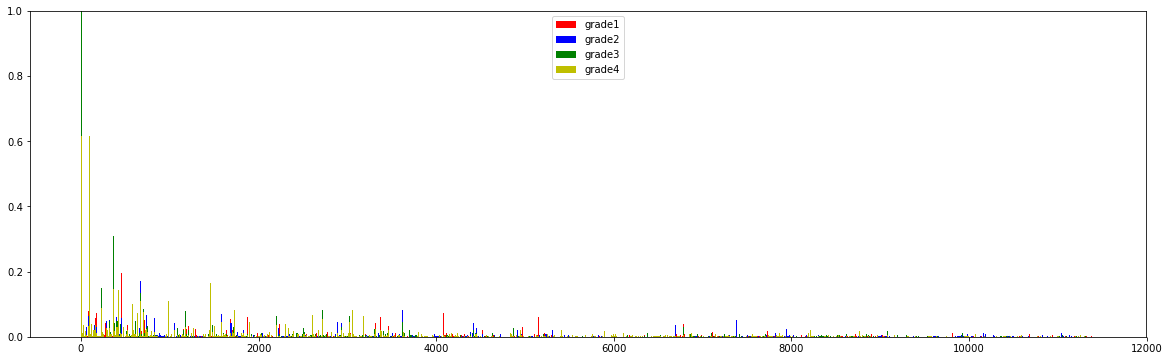

In [13]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(20,6))
#plt.subplot(2,2,1)
plt.bar(x,y1,width = 1,color='r',label='grade1')
#plt.subplot(2,2,2)
plt.bar(x,y2,width = 1,color='b',label='grade2')
#plt.subplot(2,2,3)
plt.bar(x,y3,width = 1,color='g',label='grade3')
#plt.subplot(2,2,4)
plt.bar(x,y4,width = 1,color='y',label='grade4')
plt.ylim(0,1)
plt.legend(loc='upper center')

#plt.savefig('Word to Grade.jpg')
plt.show()

# 数据库

In [11]:
import pymssql
class MSSQL:
    def __init__(self, host, user, pwd, db):
        self.host = host
        self.user = user
        self.pwd = pwd
        self.db = db
        
    def __GetConnect(self):
        if not self.db:
            raise(NameError, '没有设置数据库信息')
        self.conn = pymssql.connect(host=self.host,user=self.user,password=self.pwd,database=self.db,charset='utf8')
        cur=self.conn.cursor()
        if not cur:
            raise(NameError,'连接数据库失败')
        else:
            return cur
        
    def ExecQuery(self, sql):
        cur = self.__GetConnect()
        cur.execute(sql)
        resList = cur.fetchall()
        self.conn.close()
        return resList
    
    def ExecNonQuery(self, sql):
        cur = self.__GetConnect()
        cur.execute(sql)
        self.conn.commit()
        self.conn.close()

ms = MSSQL(host=r'(local)',user=r'DRAKE',pwd=r'123456',db=r'answer')

# 数据库操作

In [12]:
import codecs
import json

gradeAndGradeName = {}
subjectAndCourseName = {}
with codecs.open('answer.txt','r','utf-8') as lf:
    for line in lf:
        js = json.loads(line)
        tmpGrade = js['value']['grade']
        if tmpGrade not in gradeAndGradeName:
            gradeAndGradeName[tmpGrade] = js['value']['gradeName']
        tmpSubject = js['value']['subject']
        if tmpSubject not in subjectAndCourseName:
            subjectAndCourseName[tmpSubject] = js['value']['courseName']

for item in gradeAndGradeName:
    print(item, gradeAndGradeName[item])
    #ms.ExecNonQuery("if not exists(select * from dbo.gradeAndGradeName where dbo.gradeAndGradeName.grade=%d) insert into dbo.gradeAndGradeName values(%d,'%s')"%(item,item,gradeAndGradeName[item]))
for item in subjectAndCourseName:
    print(item, subjectAndCourseName[item])
    #ms.ExecNonQuery("if not exists(select * from dbo.subjectAndCourseName where dbo.subjectAndCourseName.subject=%d) insert into dbo.subjectAndCourseName values(%d,'%s')"%(item,item, subjectAndCourseName[item]))

7 高三
4 初三
6 高二
1 小学
2 初一
3 初二
5 高一
2 数学
4 历史
8 物理
6 政治
7 生物
9 化学
5 地理
